In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.mlab
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')

In [328]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [331]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Glancing at the summary above and looking at the dataset on kaggle, here are some observations:

* generally, there are abundant order of magnitude errors in many columns. 
* infant deaths don't make sense over 1000, since the metric is per 1000. It's not clear if there is an order of magnitude error here. There is little loss in just removing the entries with this mistake, since around 10 entries have this problem. Furthermore there is a huge gap between the data reaching in the 500's and the next value which is slightly less than 1000. We remove the values above 800. Retaining values above 100 are still extreme outliers, but there are many with this criteria.
* percentage expenditure is a complete mess. For values between 100 and 1000, it's not clear if the order of magnitude error is off by 1 or 2. For values between 1000 and 10000, it is likely 2 orders off. For values above 10000, it's even harder to attribute what the error is exactly, since it's also likely that the raw monetary value was used instead of converting to a percentage or ratio. Over half of the entries have more than 100. The data in this column is not very usable (with no clear way to clean). We drop this column entirely
* for measles and under 5 deaths, we remove the values above 1000, since it's again per 1000 people
* population and GDP have many order of magnitude erros. We won't use these columns for data analysis. There is also many nulls in these columns. We drop these columns entirely.
* a zero in income composition of resources seems strange, considering there are no values between zero and 0.2. We remove entries that have a zero in this category (similarly for schooling).
* the median BMI around the world appears to be 43.5, which is nonsense. Many entries have errors here. It's hard to say what the errors are exactly. We remove this column, since the data is not useful and nearly impossible to clean.

In [332]:
df.drop(columns=['percentage expenditure', 'Population', 'GDP', ' BMI '], inplace=True)

In [333]:
df.drop(df[(df['infant deaths'] > 800) | (df['Measles '] > 999) | (df['under-five deaths '] > 999)
          | (df['Income composition of resources'] == 0) | (df['Schooling'] == 0)].index, inplace=True)

In [334]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2294.000000,2286.000000,2286.000000,2294.000000,2135.000000,1942.000000,2294.000000,2294.000000,2291.000000,2115.000000,2291.000000,2294.000000,2283.000000,2283.000000,2182.000000,2184.000000
mean,2008.036617,70.730227,153.267279,10.608980,4.988951,83.160659,90.879686,14.738448,85.494544,6.133442,85.379310,1.617044,4.111170,4.113009,0.680164,12.638324
std,4.466717,8.984018,119.761392,24.887924,4.113050,23.818131,188.791274,36.094313,21.235308,2.534381,21.405702,5.232773,3.498612,3.547993,0.155283,2.949578
min,2000.000000,36.300000,1.000000,0.000000,0.010000,2.000000,0.000000,0.000000,3.000000,0.370000,2.000000,0.100000,0.100000,0.100000,0.268000,2.900000
25%,2004.000000,65.900000,71.000000,0.000000,1.200000,82.000000,0.000000,0.000000,84.000000,4.480000,84.000000,0.100000,1.400000,1.400000,0.579000,10.800000
50%,2008.000000,73.000000,133.000000,2.000000,4.220000,93.000000,4.000000,2.000000,94.000000,5.990000,94.000000,0.100000,2.800000,2.900000,0.707000,12.800000
75%,2012.000000,76.600000,211.000000,10.000000,8.245000,97.000000,70.750000,12.000000,97.000000,7.710000,97.000000,0.400000,6.400000,6.300000,0.796000,14.600000
max,2015.000000,89.000000,723.000000,549.000000,17.870000,99.000000,999.000000,879.000000,99.000000,17.600000,99.000000,50.600000,19.700000,19.900000,0.948000,20.700000


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2294 entries, 1 to 2936
Data columns (total 18 columns):
Country                            2294 non-null object
Year                               2294 non-null int64
Status                             2294 non-null object
Life expectancy                    2286 non-null float64
Adult Mortality                    2286 non-null float64
infant deaths                      2294 non-null int64
Alcohol                            2135 non-null float64
Hepatitis B                        1942 non-null float64
Measles                            2294 non-null int64
under-five deaths                  2294 non-null int64
Polio                              2291 non-null float64
Total expenditure                  2115 non-null float64
Diphtheria                         2291 non-null float64
 HIV/AIDS                          2294 non-null float64
 thinness  1-19 years              2283 non-null float64
 thinness 5-9 years                2283 non-null

In [336]:
countries = df["Country"].unique()

#interpolate numeric values by country
for country in countries:
    df.loc[df["Country"] == country, numeric_columns] = df.loc[df["Country"] == country, numeric_columns].interpolate()

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2294 entries, 1 to 2936
Data columns (total 18 columns):
Country                            2294 non-null object
Year                               2294 non-null int64
Status                             2294 non-null object
Life expectancy                    2286 non-null float64
Adult Mortality                    2286 non-null float64
infant deaths                      2294 non-null int64
Alcohol                            2136 non-null float64
Hepatitis B                        2157 non-null float64
Measles                            2294 non-null int64
under-five deaths                  2294 non-null int64
Polio                              2294 non-null float64
Total expenditure                  2117 non-null float64
Diphtheria                         2294 non-null float64
 HIV/AIDS                          2294 non-null float64
 thinness  1-19 years              2283 non-null float64
 thinness 5-9 years                2283 non-null

In [338]:
#Most entries don't have null values, so we remove those with any null values.
#All together, we still have around two thirds of the data after this step

df.dropna(inplace=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,62.0,492,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,64.0,430,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,67.0,466,120,5.0,8.79,5.0,0.1,19.5,19.7,0.381,6.8
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,65.0,798,122,41.0,8.82,41.0,0.1,19.7,19.9,0.373,6.5
16,Albania,2015,Developing,77.8,74.0,0,4.60,99.0,0,0,99.0,6.00,99.0,0.1,1.2,1.3,0.762,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,65.0,420,43,69.0,6.44,68.0,30.3,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,68.0,31,42,67.0,7.13,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,7.0,998,41,7.0,6.52,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,73.0,304,40,73.0,6.53,71.0,39.8,1.2,1.3,0.427,10.0


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 1 to 2936
Data columns (total 18 columns):
Country                            1905 non-null object
Year                               1905 non-null int64
Status                             1905 non-null object
Life expectancy                    1905 non-null float64
Adult Mortality                    1905 non-null float64
infant deaths                      1905 non-null int64
Alcohol                            1905 non-null float64
Hepatitis B                        1905 non-null float64
Measles                            1905 non-null int64
under-five deaths                  1905 non-null int64
Polio                              1905 non-null float64
Total expenditure                  1905 non-null float64
Diphtheria                         1905 non-null float64
 HIV/AIDS                          1905 non-null float64
 thinness  1-19 years              1905 non-null float64
 thinness 5-9 years                1905 non-null

In [343]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,2007.512336,70.105039,157.436745,10.120735,4.626601,79.169029,92.098688,14.057743,84.839895,5.929549,84.982677,1.840105,4.329764,4.337795,0.668232,12.405774
std,4.176764,8.891049,122.542045,22.707635,4.000143,27.026574,192.324750,33.254838,21.658689,2.338840,21.533153,5.687983,3.557918,3.600761,0.150746,2.823537
min,2000.000000,36.300000,1.000000,0.000000,0.010000,2.000000,0.000000,0.000000,3.000000,0.370000,2.000000,0.100000,0.100000,0.100000,0.268000,2.900000
25%,2004.000000,65.300000,73.000000,0.000000,1.040000,75.000000,0.000000,0.000000,83.000000,4.370000,83.000000,0.100000,1.600000,1.600000,0.571000,10.700000
50%,2008.000000,72.800000,138.000000,2.000000,3.890000,92.000000,4.000000,2.000000,94.000000,5.840000,94.000000,0.100000,3.200000,3.200000,0.698000,12.600000
75%,2011.000000,75.700000,216.000000,10.000000,7.430000,96.000000,70.000000,13.000000,97.000000,7.400000,97.000000,0.600000,6.600000,6.600000,0.782000,14.200000
max,2015.000000,89.000000,723.000000,549.000000,17.870000,99.000000,999.000000,879.000000,99.000000,14.390000,99.000000,50.600000,19.700000,19.900000,0.936000,20.700000


In [344]:
df.describe(include=['O'])

,Country,Status
count,1905,1905
unique,159,2
top,Albania,Developing
freq,16,1596


In [346]:
#countries that have only a few years of data aren't as useful, and the data is even more sensitive to errors.
#We remove countries that have less than 5 entries; this only removes less than 40 entries total

filtered = df.groupby('Country')['Country'].filter(lambda x: len(x) >= 5)
filtered
df = df[df['Country'].isin(filtered)]
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,99.0,0,0,99.0,6.00,99.0,0.1,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,98.0,0,1,98.0,5.88,98.0,0.1,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,99.0,0,1,99.0,5.66,99.0,0.1,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,99.0,9,1,99.0,5.59,99.0,0.1,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,99.0,28,1,99.0,5.71,99.0,0.1,1.4,1.5,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,65.0,420,43,69.0,6.44,68.0,30.3,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,68.0,31,42,67.0,7.13,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,7.0,998,41,7.0,6.52,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,73.0,304,40,73.0,6.53,71.0,39.8,1.2,1.3,0.427,10.0


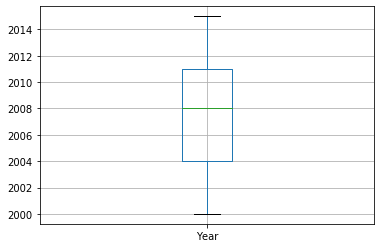

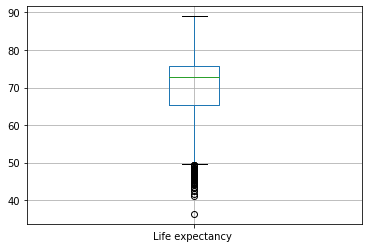

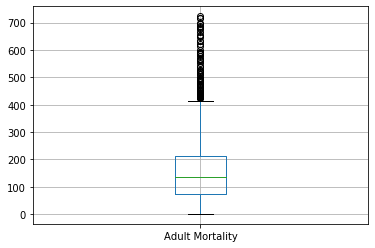

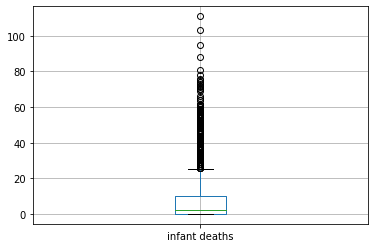

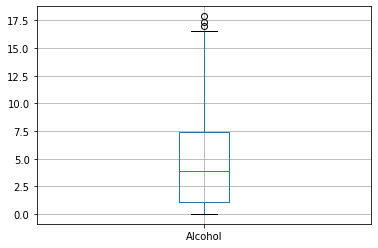

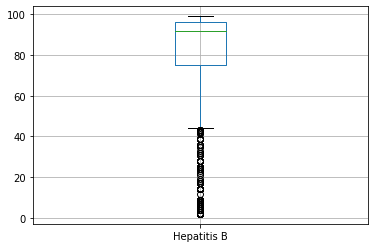

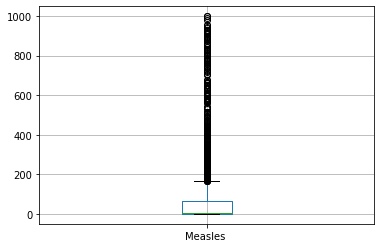

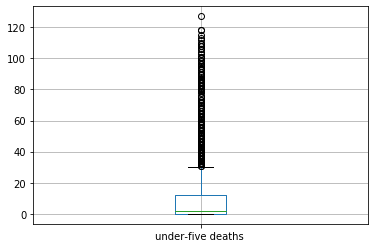

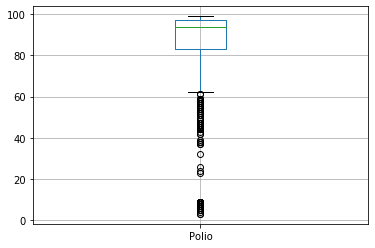

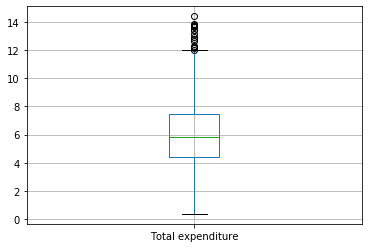

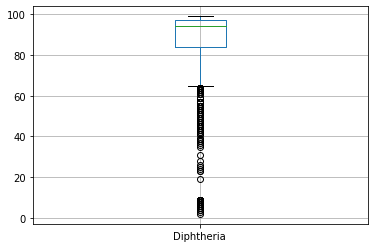

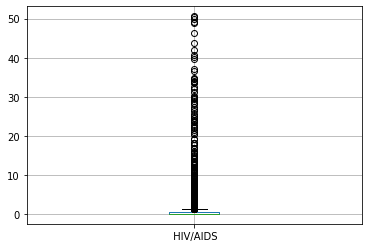

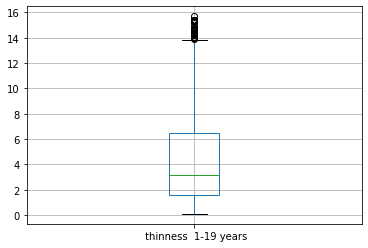

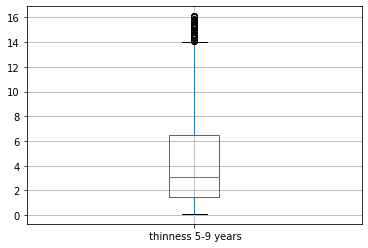

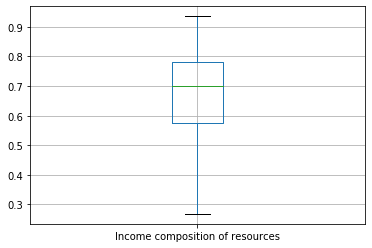

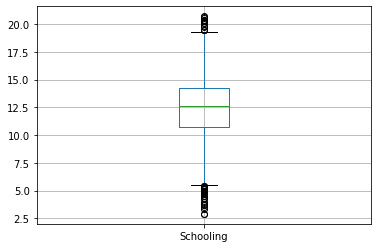

In [347]:
numeric_columns = df.select_dtypes(exclude=['object']).columns

for column in numeric_columns:
    plt.figure()
    df.boxplot([column])
    plt.show()

In [354]:
#We apply two-sided winsorization of 10%.
df1 = df

for column in numeric_columns:
    df1[column] = winsorize(df[column], (0.1, 0.1))

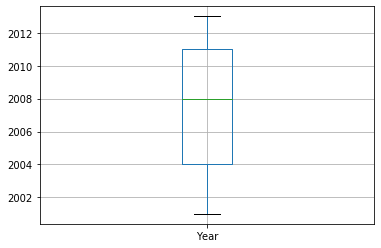

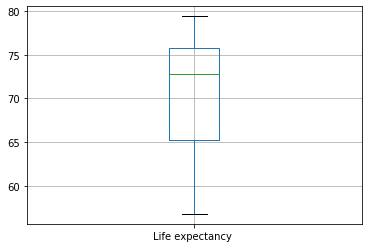

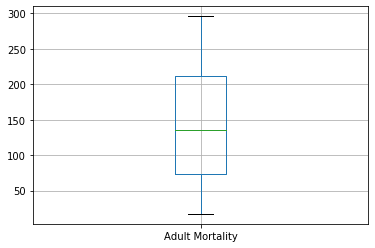

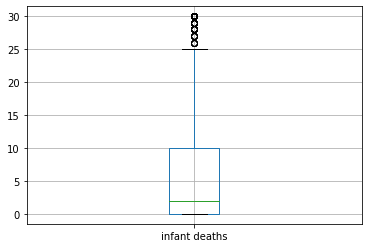

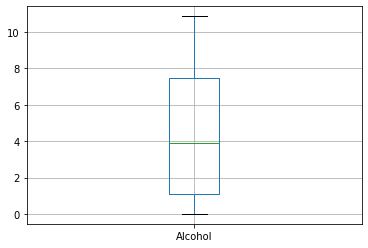

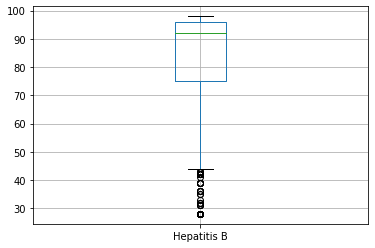

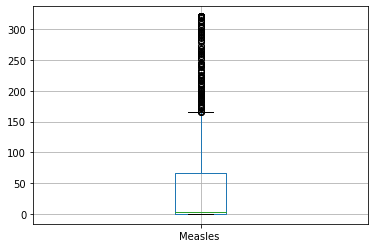

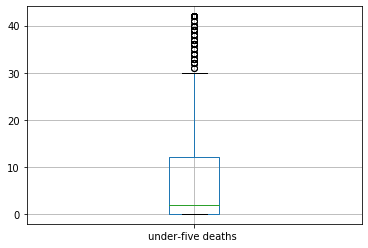

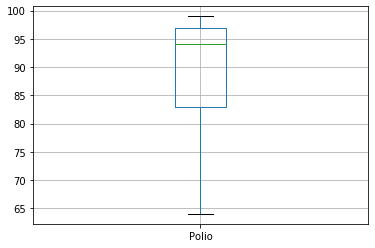

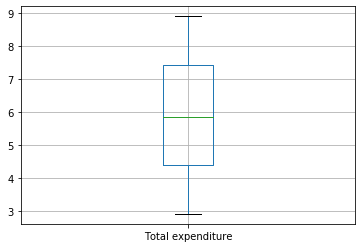

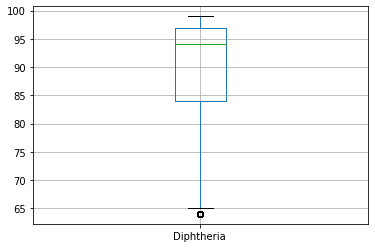

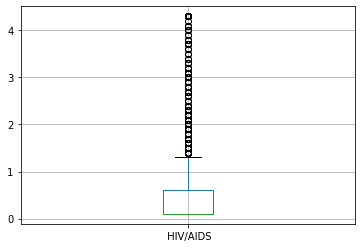

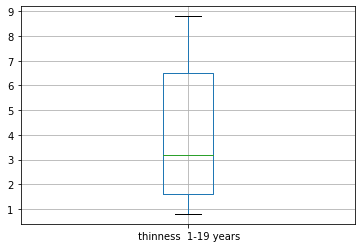

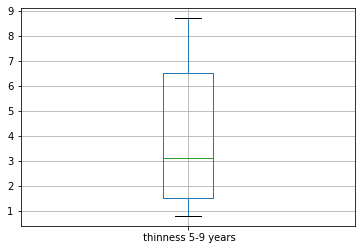

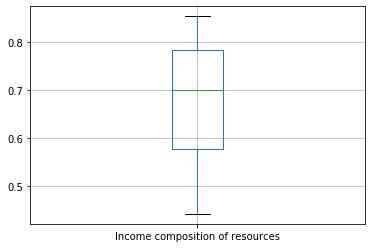

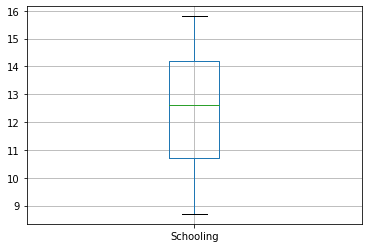

In [355]:
for column in numeric_columns:
    plt.figure()
    df1.boxplot([column])
    plt.show()

In [359]:
df1.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.044748,-0.027076,0.023236,-0.126841,0.193542,-0.010142,0.023061,0.036720,0.053791,0.076183,-0.044064,0.030278,0.034120,0.053155,0.097234
Life expectancy,0.044748,1.000000,-0.641241,-0.536941,0.383966,0.241692,-0.245824,-0.565811,0.514921,0.208443,0.508999,-0.777618,-0.618066,-0.620142,0.890273,0.784661
Adult Mortality,-0.027076,-0.641241,1.000000,0.335208,-0.169174,-0.176467,0.121764,0.352530,-0.309352,-0.131217,-0.300632,0.507338,0.395404,0.394702,-0.566766,-0.482643
infant deaths,0.023236,-0.536941,0.335208,1.000000,-0.327903,-0.118316,0.383453,0.994843,-0.334468,-0.091488,-0.328321,0.392321,0.387904,0.384366,-0.565180,-0.516489
Alcohol,-0.126841,0.383966,-0.169174,-0.327903,1.000000,0.023039,-0.159721,-0.321283,0.219076,0.328699,0.234484,-0.143452,-0.465993,-0.452501,0.524231,0.534782
Hepatitis B,0.193542,0.241692,-0.176467,-0.118316,0.023039,1.000000,-0.118068,-0.125097,0.529987,0.077722,0.583652,-0.277357,-0.092315,-0.090278,0.230233,0.213389
Measles,-0.010142,-0.245824,0.121764,0.383453,-0.159721,-0.118068,1.000000,0.383563,-0.169561,-0.102907,-0.179286,0.194082,0.256694,0.249699,-0.209566,-0.198376
under-five deaths,0.023061,-0.565811,0.352530,0.994843,-0.321283,-0.125097,0.383563,1.000000,-0.348839,-0.092020,-0.342471,0.425464,0.402806,0.398653,-0.588652,-0.534139
Polio,0.036720,0.514921,-0.309352,-0.334468,0.219076,0.529987,-0.169561,-0.348839,1.000000,0.158266,0.881548,-0.436094,-0.260427,-0.254567,0.521743,0.493259
Total expenditure,0.053791,0.208443,-0.131217,-0.091488,0.328699,0.077722,-0.102907,-0.092020,0.158266,1.000000,0.175628,-0.075994,-0.350276,-0.348582,0.160929,0.236166


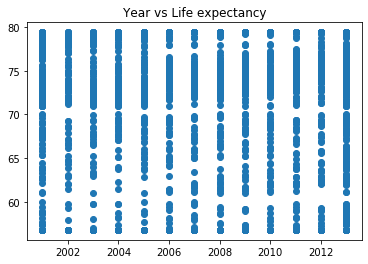

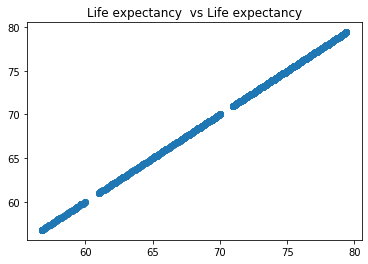

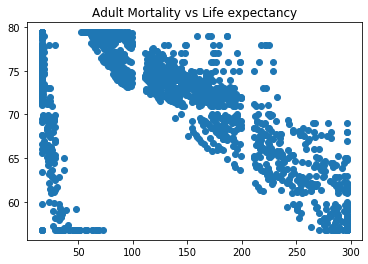

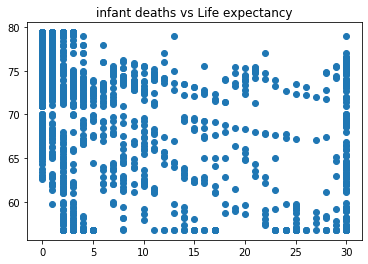

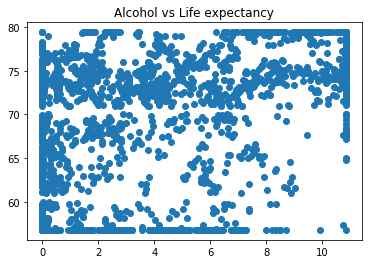

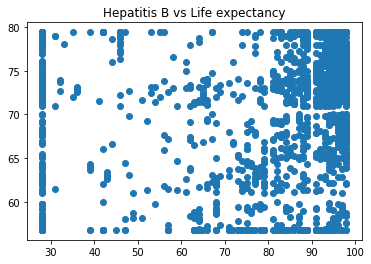

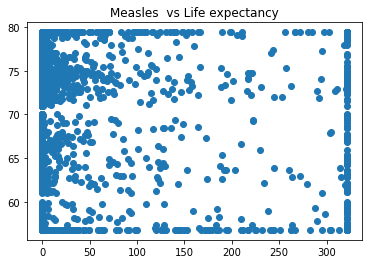

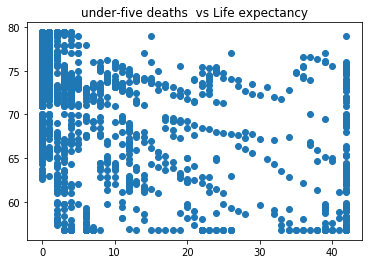

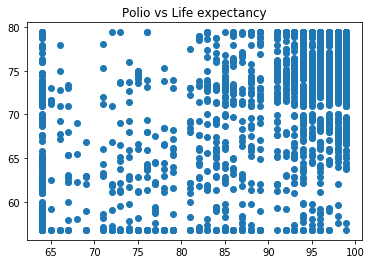

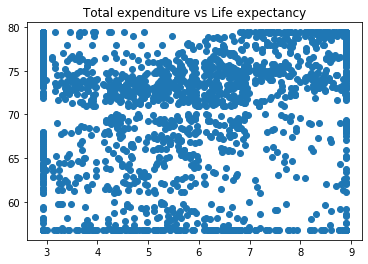

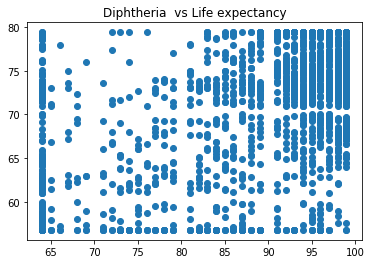

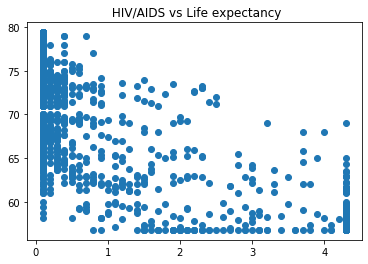

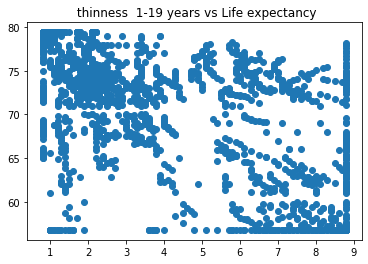

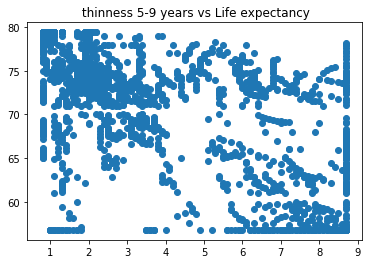

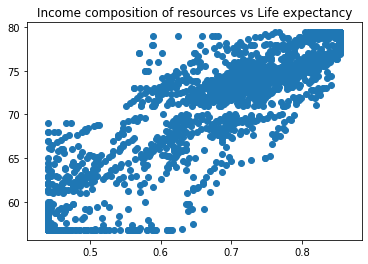

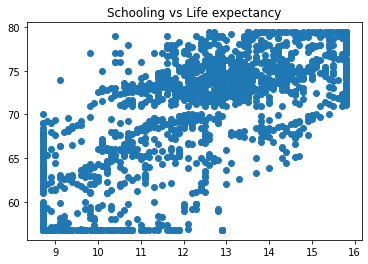

In [360]:
for column in numeric_columns:
    plt.figure()
    plt.scatter(df1[column],df1["Life expectancy "])
    plt.title(column + " vs Life expectancy")
    plt.show

In [276]:
df1.groupby("Status").mean()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,,,,,,,,,,,,,,,,
Developed,2006.961165,78.258252,83.339806,0.585761,9.765761,82.355987,68.608414,0.731392,93.987055,7.037443,93.200647,0.100000,1.375081,1.381553,0.841353,15.619094
Developing,2007.313468,68.691836,164.010727,9.247914,3.543346,78.159118,78.967223,12.481526,83.048272,5.648665,83.109654,1.273778,4.699881,4.666508,0.596364,11.652920


In [380]:
#Since our target is the one variable life expectancy, we remove variables that have low correlation with our target.
#We retain the categorical variables and all numeric variables that have correlation plus or minus 0.5 or better.
#Also, infant death and under-five deaths are highly correlated with coeff 0.994843, so we remove one of the two.
#We keep under-five deaths because it is better correlated with life expectancy.
#A similar statement applies to the two thinness variables, Diphtheria and Polio, and the last two variables.

good_correlation = ['Country', 'Status', 'Life expectancy ', 'Adult Mortality', 'under-five deaths ', 'Polio',
                    ' HIV/AIDS', ' thinness 5-9 years', 'Income composition of resources']
good_correlation_numeric = ['Life expectancy ', 'Adult Mortality', 'under-five deaths ', 'Polio',
                            ' HIV/AIDS', ' thinness 5-9 years', 'Income composition of resources']
good_correlation_numeric_nontarget = ['Adult Mortality', 'under-five deaths ', 'Polio',
                                      ' HIV/AIDS', ' thinness 5-9 years', 'Income composition of resources']

df2 = df1[good_correlation]

In [381]:
df2.corr()

,Life expectancy,Adult Mortality,under-five deaths,Polio,HIV/AIDS,thinness 5-9 years,Income composition of resources
Life expectancy,1.000000,-0.641241,-0.565811,0.514921,-0.777618,-0.620142,0.890273
Adult Mortality,-0.641241,1.000000,0.352530,-0.309352,0.507338,0.394702,-0.566766
under-five deaths,-0.565811,0.352530,1.000000,-0.348839,0.425464,0.398653,-0.588652
Polio,0.514921,-0.309352,-0.348839,1.000000,-0.436094,-0.254567,0.521743
HIV/AIDS,-0.777618,0.507338,0.425464,-0.436094,1.000000,0.505034,-0.637096
thinness 5-9 years,-0.620142,0.394702,0.398653,-0.254567,0.505034,1.000000,-0.592463
Income composition of resources,0.890273,-0.566766,-0.588652,0.521743,-0.637096,-0.592463,1.000000


In [376]:
df2.groupby("Status").mean()

,Life expectancy,Adult Mortality,under-five deaths,Polio,HIV/AIDS,thinness 5-9 years,Income composition of resources
Status,,,,,,,
Developed,77.542718,83.919094,0.731392,94.521036,0.100000,1.467314,0.825311
Developing,69.053333,155.444231,11.313462,87.321154,0.954808,4.485769,0.642649


In [378]:
#Analyzing the categorical variable status, we apply t-test to each numerical variable
from scipy.stats.stats import ttest_ind

for column in good_correlation_numeric:
    print(column)
    print(ttest_ind(df[df["Status"] == "Developed"][column],
          df[df["Status"] == "Developing"][column]))

Life expectancy 
Ttest_indResult(statistic=20.849729551867874, pvalue=5.834566298928069e-87)
Adult Mortality
Ttest_indResult(statistic=-13.396621979064266, pvalue=3.82148036894064e-39)
under-five deaths 
Ttest_indResult(statistic=-12.60800468389413, pvalue=4.889244018006629e-35)
Polio
Ttest_indResult(statistic=10.38150323916505, pvalue=1.3844240179350094e-24)
 HIV/AIDS
Ttest_indResult(statistic=-10.292492119861011, pvalue=3.331998993731402e-24)
 thinness 5-9 years
Ttest_indResult(statistic=-19.18926617301866, pvalue=4.764824782555817e-75)
Income composition of resources
Ttest_indResult(statistic=25.16422738249027, pvalue=1.4501351705193893e-120)


Whether a country is developed is highly highly statistically significant in all the remaining variables. The highest p value is 24 orders of magnitude away from 1. And for our target variable life expectancy, the p value is incredibly low at 87 orders of magnitude away from 1. From this we can conclude that status of country is a major factor that affects life expectancy.

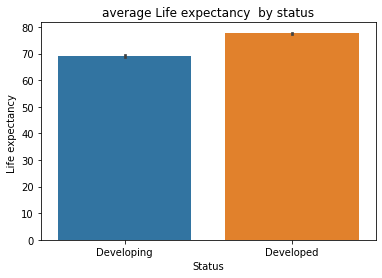

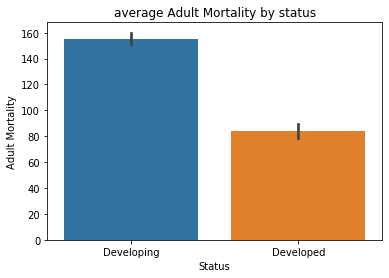

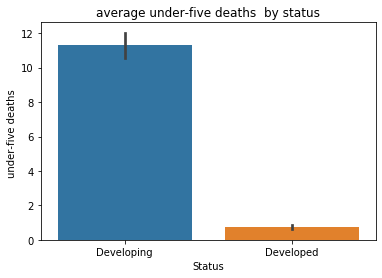

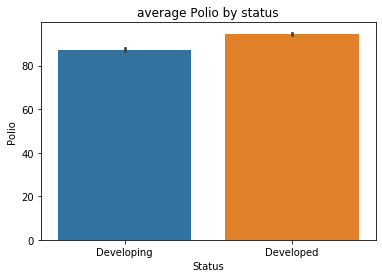

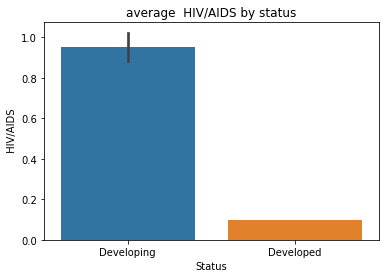

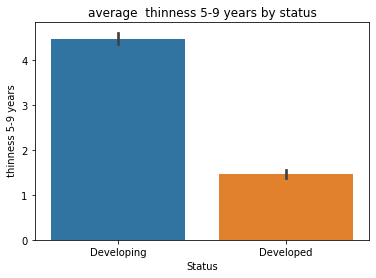

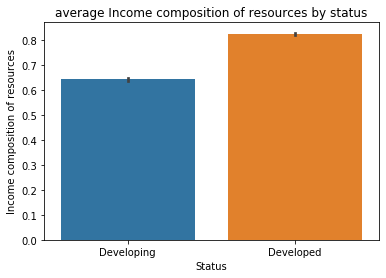

In [379]:
for column in good_correlation_numeric:
    plt.figure()
    sns.barplot(df2["Status"], df[column])
    plt.title("average " + column + " by status")
    plt.show

In [401]:
#We apply PCA to the non-target numeric variables

X = df2[good_correlation_numeric_nontarget]
X = StandardScaler().fit_transform(X)


sklearn_pca = PCA(n_components=3)
df2["pca_1"], df2["pca_2"], df2["pca_3"] = sklearn_pca.fit_transform(X).T
df2

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.55307069 0.12671662 0.10994032]


In [402]:
df2.corr()

,Life expectancy,Adult Mortality,under-five deaths,Polio,HIV/AIDS,thinness 5-9 years,Income composition of resources,pca_1,pca_2,pca_3
Life expectancy,1.000000,-0.641241,-0.565811,0.514921,-0.777618,-0.620142,0.890273,-9.121675e-01,4.425435e-02,6.720787e-02
Adult Mortality,-0.641241,1.000000,0.352530,-0.309352,0.507338,0.394702,-0.566766,7.041035e-01,-2.105246e-01,-4.886857e-01
under-five deaths,-0.565811,0.352530,1.000000,-0.348839,0.425464,0.398653,-0.588652,6.972230e-01,5.385336e-02,5.902200e-01
Polio,0.514921,-0.309352,-0.348839,1.000000,-0.436094,-0.254567,0.521743,-6.282241e-01,-7.162360e-01,1.053510e-01
HIV/AIDS,-0.777618,0.507338,0.425464,-0.436094,1.000000,0.505034,-0.637096,8.002430e-01,-3.801315e-02,-1.906181e-01
thinness 5-9 years,-0.620142,0.394702,0.398653,-0.254567,0.505034,1.000000,-0.592463,7.110410e-01,-4.456005e-01,1.501400e-01
Income composition of resources,0.890273,-0.566766,-0.588652,0.521743,-0.637096,-0.592463,1.000000,-8.921371e-01,-8.952243e-03,-4.992458e-02
pca_1,-0.912167,0.704104,0.697223,-0.628224,0.800243,0.711041,-0.892137,1.000000e+00,3.455529e-16,3.195504e-16
pca_2,0.044254,-0.210525,0.053853,-0.716236,-0.038013,-0.445601,-0.008952,3.455529e-16,1.000000e+00,6.194900e-16
pca_3,0.067208,-0.488686,0.590220,0.105351,-0.190618,0.150140,-0.049925,3.195504e-16,6.194900e-16,1.000000e+00


<function matplotlib.pyplot.show(*args, **kw)>

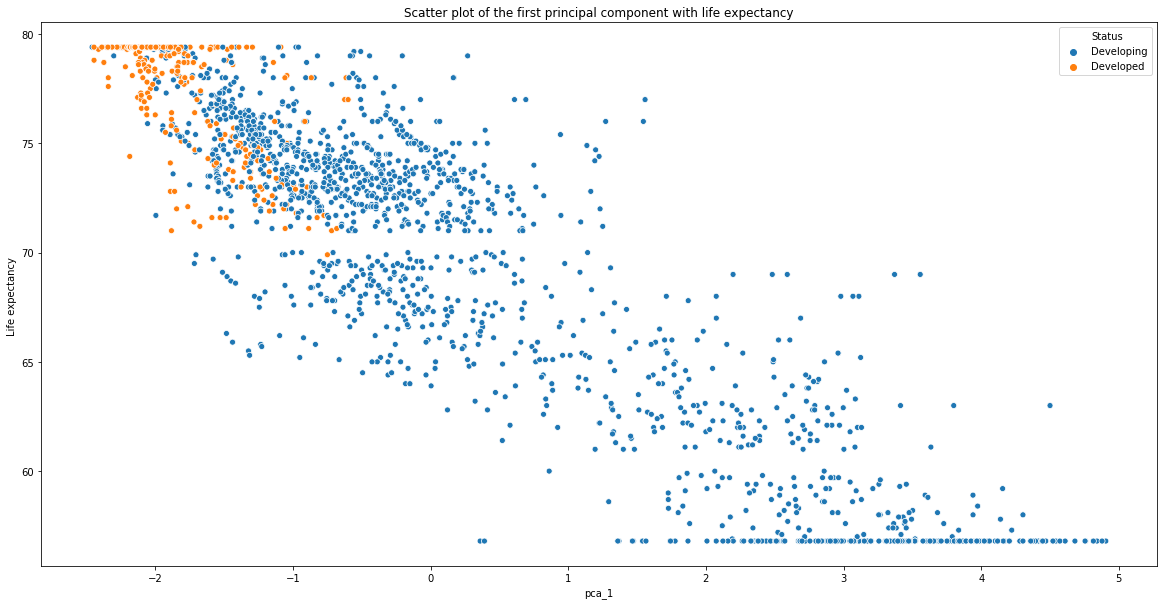

In [412]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df2["pca_1"], y=df2["Life expectancy "], hue=df2["Status"])
plt.title("Scatter plot of the first principal component with life expectancy")
plt.show

The first PCA component has a strong correlation of -0.912 with the target variable, which is slightly better than income composition of resources correlation. In conclusion, all of the numeric variables retained after dropping the low correlation variables are likely important factors in life expectancy. In particular, status of the country along with income compostion of resources are the strongest indicators.